In [459]:
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.preprocessing import PolynomialFeatures # 다항 특성을 만들어준다
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #선형회귀
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [460]:
import pandas as pd
df = pd.read_csv('https://bit.ly/fish_csv')
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [461]:
df.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [462]:
# 분류하는 형태 7 가지
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [463]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [464]:
# str문자가 있는지 확인 문자타입 확인 필요
# 문자가 존재하면 머신러닝이 안돌아간다.
# 문자 - 삭제 // 문자 - 코드 변경할것인가 판단해야한다.
# 1. 문자 아스키코드 변경 - 표준점수
# 2. 원핫인코딩 방식

# object(str) - result,target 문자 올수있다.

In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [466]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [467]:
# pandas 원핫인코딩 함수
pd.get_dummies(df['Species'])

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...
154,False,False,False,False,False,True,False
155,False,False,False,False,False,True,False
156,False,False,False,False,False,True,False
157,False,False,False,False,False,True,False


In [468]:
#   str문자 타입 존재를 하면 
# - 제거를 나중에 타입을 df 합칠지
# - 원핫인코딩으로 만들어서 머신러닝 돌릴지 판단

In [469]:
df_dumm =  pd.get_dummies(df['Species'])
df_dumm.head(36)

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False
5,True,False,False,False,False,False,False
6,True,False,False,False,False,False,False
7,True,False,False,False,False,False,False
8,True,False,False,False,False,False,False
9,True,False,False,False,False,False,False


In [470]:
# 데이터 전처리
# 데이터전처리
# 데이터 학습시키기
# 데이터 정답률

# 데이터 전처리
# 다시 학습시키기

In [471]:
# # 데이터 전처리 target,input 분리 ------------pandas
# df_target = df['Species']
# df_input = df.iloc[:,1:]

In [472]:
# from sklearn.model_selection import train_test_split #------------pandas
# train_input,test_input,train_target,test_target = train_test_split(
#     df_input,df_target ,random_state=42
# )

In [473]:
# 데이터 전처리 target,input 분리
d_target = df['Species'].to_numpy()
d_input = df.iloc[:,1:].to_numpy()

In [474]:
# 데이터 전처리 train,test 분리
# train,test 세트 분리
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(
    d_input,d_target ,random_state=42
)

In [475]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [476]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled,train_target)

LogisticRegression()

In [477]:
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.8067226890756303
0.85


## 반복횟수를 늘려서 정답률 높이는 작업

In [478]:
#### 반복횟수를 늘려서 정답률 높이는 작업

In [479]:
lr = LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled,train_target)

LogisticRegression(C=20, max_iter=1000)

In [480]:
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


In [481]:
# 로지스틱 회귀 분류 모델을 완성

In [482]:
#경사하강법 - 머신러닝 튜닝, 기존에 훈련된
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss',max_iter=10,random_state=42)

sc.fit(train_scaled,train_target)


c:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [483]:
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


In [484]:
classes = np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [485]:
# classes=classes 꼭 추가해줘야함
sc.partial_fit(train_scaled,train_target,classes=classes)

SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [486]:
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.85


In [487]:
# partial_fit 반복적으로 시키면 효율이 올라감

train_score = []
test_score = []

for _ in  range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    sc1= sc.score(train_scaled,train_target)
    train_score.append(sc1)
    sc2=sc.score(test_scaled,test_target)
    test_score.append(sc2)

In [488]:
train_score

[0.7815126050420168,
 0.8067226890756303,
 0.8487394957983193,
 0.8571428571428571,
 0.8487394957983193,
 0.865546218487395,
 0.8487394957983193,
 0.8571428571428571,
 0.8487394957983193,
 0.8487394957983193,
 0.8487394957983193,
 0.8739495798319328,
 0.8823529411764706,
 0.8823529411764706,
 0.8823529411764706,
 0.8907563025210085,
 0.8823529411764706,
 0.8991596638655462,
 0.8823529411764706,
 0.8991596638655462,
 0.8823529411764706,
 0.8991596638655462,
 0.8823529411764706,
 0.8991596638655462,
 0.907563025210084,
 0.9243697478991597,
 0.9159663865546218,
 0.9159663865546218,
 0.9159663865546218,
 0.9243697478991597,
 0.9159663865546218,
 0.9327731092436975,
 0.9243697478991597,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9243697478991597,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.9327731092436975,
 0.932773109243

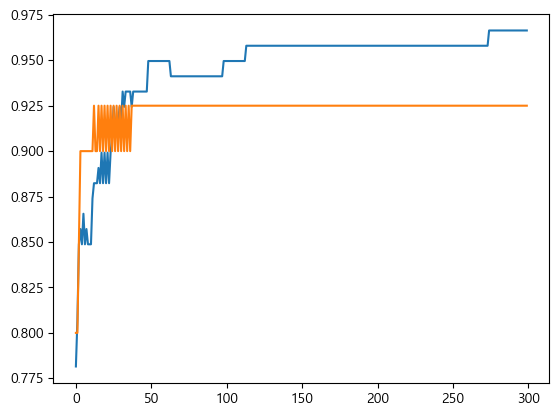

In [489]:
plt.plot(train_score)
plt.plot(test_score)

In [492]:
sc = SGDClassifier(loss='log_loss',tol=None,max_iter=100,random_state=42)

sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925
